# My first applied machine learning notebook. 
We are going to get some data about cars and use it to create and evaluate a predictive model.  Here are the steps will we use:
1. Read in the data from a CSV file
2. Clean the data
3. Create a model and fit it to the data
4. Get performance metrics for the model

In [21]:
## Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [22]:
## Load the data
df = pd.read_csv('automobile_price_data3.csv')

Index(['normalized-losses', 'make', 'fuel', 'doors', 'body', 'drive', 'weight',
       'engine-size', 'bhp', 'mpg', 'price'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   make               205 non-null    object 
 2   fuel               205 non-null    object 
 3   doors              203 non-null    object 
 4   body               205 non-null    object 
 5   drive              205 non-null    object 
 6   weight             205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bhp                203 non-null    float64
 9   mpg                205 non-null    int64  
 10  price              201 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 17.7+ KB


array([[<Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'engine-size'}>,
        <Axes: title={'center': 'bhp'}>],
       [<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

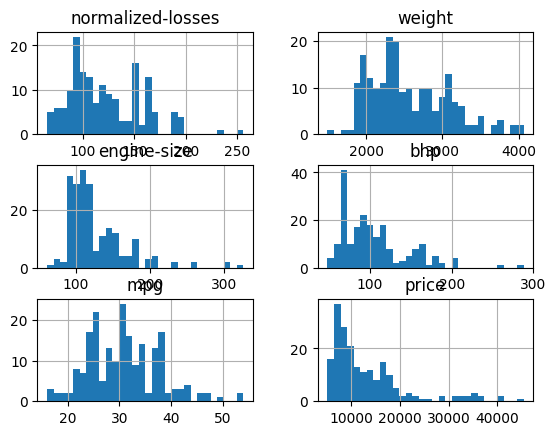

In [23]:
## Explore the Data 
print(df.keys())

print()
df.head(n=10)
#df.tail(n=5)
df.info()
df.tail(n=5)

## Data Visualization
df.hist(bins=30)

### Clean the data:
Remove columns or rows that have missing data.
Look at the distribution of the data values

In [24]:
## Clean Data 
# Step 1: Identify missing values
missing_values = df.isnull().sum()

print("Missing values per feature:\n", missing_values)


Missing values per feature:
 normalized-losses    41
make                  0
fuel                  0
doors                 2
body                  0
drive                 0
weight                0
engine-size           0
bhp                   2
mpg                   0
price                 4
dtype: int64


In [25]:
# Step 2: Drop columns with excessive missing values (e.g., more than 30% missing)
threshold = 0.3 * len(df)  # Define threshold for removal
sparse_columns = missing_values[missing_values > threshold].index
df.drop(columns=sparse_columns, inplace=True)


In [26]:
# Step 3: Drop rows with any missing values
df.dropna(axis='index', how="any", inplace=True)

# Alternative: Impute missing values for numerical features with median
for column in df.select_dtypes(include=['number']).columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].median(), inplace=True)

# Alternative: Impute missing values for categorical features with mode
for column in df.select_dtypes(include=['object']).columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True)


In [27]:
# Step 4: Drop duplicate rows
df.drop_duplicates(inplace=True)

# Step 5: Ensure correct data types (convert categorical variables if needed)
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category')

# Step 6: Save the cleaned dataset
df.to_csv("JB_cleaned_dataset.csv", index=False)

print("Data cleaning completed. Cleaned dataset saved as 'JB_cleaned_dataset.csv'.")

Data cleaning completed. Cleaned dataset saved as 'JB_cleaned_dataset.csv'.


### Create and train a model
split the data into a training set and a test set

In [28]:
# Split the data into training (80%) and test (20%) sets
train_set, test_set = train_test_split(df, test_size=0.2, random_state=100)

# Print the number of rows in each set
print(f"Training set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")

# Optional: Save the splits for future use
train_set.to_csv("train_set.csv", index=False)
test_set.to_csv("test_set.csv", index=False)

print("Data split complete. Training and test sets saved.")

Training set size: 130
Test set size: 33
Data split complete. Training and test sets saved.


### Determine the performance of the model

In [29]:
# Load the training set
reg = LinearRegression()

X = train_set[['weight', 'engine-size', 'bhp', 'mpg']]
y = train_set["price"]

reg.fit(X,y)

LinearRegression()

## Evaluate the perfromance of the model

In [30]:
print("The bias is " , reg.intercept_)
print("The feature coefficients are ", reg.coef_)
print("The score for the training set is", reg.score(X,y))

# Check the performance on the test set
X_test = test_set[['weight', 'engine-size', 'bhp', 'mpg']]
y_test = test_set["price"]
print("The score for the test set is", reg.score(X_test,y_test))

The bias is  -17646.029941132412
The feature coefficients are  [10.52827765  6.71788798 14.95984542 33.70756437]
The score for the training set is 0.823683963348026
The score for the test set is 0.7054538773580874
